# Extract features from the dataset

['.ipynb_checkpoints', 'Classical', 'Dance', 'DNB', 'Downtempo', 'Hip_Hop', 'Psytrance', 'Techno', 'Trance']
blues
	blues.00000.wav
	blues.00000.wav DONE
	blues.00001.wav
	blues.00001.wav DONE
	blues.00002.wav
	blues.00002.wav DONE
	blues.00003.wav
	blues.00003.wav DONE
	blues.00004.wav
	blues.00004.wav DONE
	blues.00005.wav
	blues.00005.wav DONE
	blues.00006.wav
	blues.00006.wav DONE
	blues.00007.wav
	blues.00007.wav DONE
	blues.00008.wav
	blues.00008.wav DONE
	blues.00009.wav
	blues.00009.wav DONE
	blues.00010.wav
	blues.00010.wav DONE
	blues.00011.wav
	blues.00011.wav DONE
	blues.00012.wav
	blues.00012.wav DONE
	blues.00013.wav
	blues.00013.wav DONE
	blues.00014.wav
	blues.00014.wav DONE
	blues.00015.wav
	blues.00015.wav DONE
	blues.00016.wav
	blues.00016.wav DONE
	blues.00017.wav
	blues.00017.wav DONE
	blues.00018.wav
	blues.00018.wav DONE
	blues.00019.wav
	blues.00019.wav DONE
	blues.00020.wav
	blues.00020.wav DONE
	blues.00021.wav
	blues.00021.wav DONE
	blues.00022.wav
	blues.000

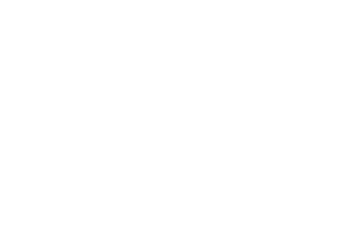

In [1]:
import os
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import csv
import numpy as np

header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'

for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()
file = open('data.csv', 'w', newline='')

with file:
    writer = csv.writer(file)
    writer.writerow(header)

dataset='GTZAN'
print(os.listdir(f'{dataset}'))
Genres = os.listdir(dataset)
print(Genres)
for genre in Genres:
    print(genre)
    Songs = os.listdir(f'{dataset}/{genre}')
    for song in Songs:
            filename=song
            print('\t'+song)
            audio_path = f"{dataset}/{genre}/{song}"
            x , sr = librosa.load(audio_path,mono=True,duration=5)
            y=x
            X = librosa.stft(x)
            Xdb = librosa.amplitude_to_db(abs(X))
            plt.axis('off')
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
            spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
            zcr = librosa.feature.zero_crossing_rate(y)
            rmse = librosa.feature.rmse(y=y)
            mfcc = librosa.feature.mfcc(y=y, sr=sr)
            to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
            for e in mfcc:
                to_append += f' {np.mean(e)}'
            to_append += f' {genre}'
            file = open('data.csv', 'a', newline='')
            with file:
                writer = csv.writer(file)
                writer.writerow(to_append.split())
            print('\t'+song+" DONE")

# Preprocess

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv("data.csv",encoding='cp1252')
data.shape
#data.drop('filename',axis=1)
print(data.head())
y= LabelEncoder().fit_transform(data.iloc[:,-1])
X = StandardScaler().fit_transform(np.array(data.iloc[:,1:-1]))

print(y.shape,X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(len(y_train),len(y_test))

print(X_train.shape,y_train.shape,y)

          filename  chroma_stft      rmse  spectral_centroid  \
0  blues.00000.wav     0.334592  0.124347        1778.396171   
1  blues.00001.wav     0.369349  0.096803        1437.209759   
2  blues.00002.wav     0.371452  0.159701        1550.039625   
3  blues.00003.wav     0.390947  0.150308         837.631494   
4  blues.00004.wav     0.305576  0.106313        2056.467528   

   spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0         1975.732030  3744.334920            0.083953 -119.049613   
1         2043.387374  3353.646851            0.045313 -231.158124   
2         1742.280596  3034.237671            0.072480 -106.462721   
3         1340.784777  1588.821411            0.024410 -224.928118   
4         1801.495755  3899.254354            0.124873 -147.972184   

        mfcc2      mfcc3  ...     mfcc12    mfcc13    mfcc14    mfcc15  \
0  124.374518 -22.895320  ...   9.024045 -5.630366  7.129668 -8.727942   
1  117.470257  13.828627  ...  10.808446 -1.18

# Build the model

In [21]:
#The test model
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation

model = models.Sequential()
model.add(layers.Dense(256, activation='elu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='elu'))
model.add(layers.Dense(64, activation='elu'))
model.add(layers.Dense(32, activation='elu'))
#model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])
history = model.fit(X_train,
                    y_train,
                    epochs=3)
#print(X_test[:1],y_test)
pred = model.predict_classes(X_test)
print(pred)
print(y_test)

Train on 700 samples
Epoch 1/3
700/700 [==============================] - 2s 3ms/sample - loss: 1.6856 - sparse_categorical_accuracy: 0.4043
Epoch 2/3
700/700 [==============================] - 0s 107us/sample - loss: 1.3232 - sparse_categorical_accuracy: 0.5371
Epoch 3/3
700/700 [==============================] - 0s 108us/sample - loss: 1.1909 - sparse_categorical_accuracy: 0.5900
[2 7 8 1 3 2 4 0 7 0 6 9 7 0 1 7 1 2 4 1 3 5 9 2 1 4 4 7 8 9 7 3 8 7 0 6 7
 0 1 7 2 5 0 5 3 5 4 3 3 3 2 7 0 5 7 1 5 6 8 4 3 2 8 4 7 2 9 1 0 2 2 3 4 5
 0 0 7 4 0 7 6 2 2 8 3 5 4 4 1 3 8 2 8 4 7 7 1 1 5 1 0 8 0 8 8 4 1 3 7 1 8
 6 7 0 4 3 5 4 7 7 4 5 2 5 1 3 2 1 7 4 6 3 7 1 1 5 2 1 2 3 6 5 4 6 1 1 9 1
 9 1 4 0 1 2 4 2 4 8 3 9 4 7 0 3 7 1 8 1 4 8 5 7 6 6 8 1 5 2 5 3 0 3 4 3 9
 0 6 3 0 9 1 1 1 1 3 8 7 1 5 8 3 0 4 3 6 5 3 0 5 8 5 6 4 1 2 2 7 8 3 1 7 5
 8 0 1 5 2 2 0 0 4 4 2 7 1 3 3 4 8 2 5 5 4 4 8 5 8 1 6 5 2 3 2 7 4 2 8 8 0
 3 0 2 0 2 5 4 6 6 5 2 2 2 4 6 7 5 4 2 6 6 0 5 7 2 4 0 1 1 1 5 0 4 0 1 7 3
 2 0 1 3]
[8 7 

In [27]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)
print('test_loss: ',test_loss)

300/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Best accuracy

In [28]:
#test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)
print('test_loss: ',test_loss)

test_acc:  0.52
test_loss:  1.417403868039449


# Save the model

In [37]:
loc = "saved_models"
tf.keras.models.save_model(model, loc)

INFO:tensorflow:Assets written to: saved_models\assets


# Load Model

In [38]:
import tensorflow_hub as hub
import numpy as np
import pandas as pd
loc = "saved_models"
new_model = tf.keras.models.load_model(loc,
custom_objects={'KerasLayer':hub.KerasLayer})

# Test model

In [48]:
from pandas import DataFrame
tf_model_predictions = new_model.predict(X_test)
df = DataFrame(data, columns= ['label'])
df = DataFrame.drop_duplicates(df)
print(df)

dataset_labels = df

tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

         label
0        blues
100  classical
200    country
300      disco
400     hiphop
500       jazz
600      metal
700        pop
800     reggae
900       rock
Prediction results for the first elements


,"(blues,)","(classical,)","(country,)","(disco,)","(hiphop,)","(jazz,)","(metal,)","(pop,)","(reggae,)","(rock,)"
0,0.102806,0.003856,0.363395,0.020267,0.047850,0.029433,0.006993,0.003405,0.359780,0.062216
1,0.008204,0.006755,0.034103,0.084959,0.096681,0.083998,0.012049,0.602329,0.048941,0.021981
2,0.043805,0.012186,0.094023,0.101568,0.220982,0.059302,0.018852,0.007925,0.372406,0.068952
3,0.005248,0.882810,0.010093,0.000187,0.000151,0.093306,0.000585,0.002115,0.002681,0.002824
4,0.034034,0.025971,0.174711,0.191607,0.066986,0.067799,0.011866,0.110576,0.157174,0.159276


# Predicted Labels

pred: [2 7 8 1 3 2 4 0 7 0 6 9 7 0 1 7 1 2 4 1 3 5 9 2 1 4 4 7 8 9 7 3 8 7 0 6 7
 0 1 7 2 5 0 5 3 5 4 3 3 3 2 7 0 5 7 1 5 6 8 4 3 2 8 4 7 2 9 1 0 2 2 3 4 5
 0 0 7 4 0 7 6 2 2 8 3 5 4 4 1 3 8 2 8 4 7 7 1 1 5 1 0 8 0 8 8 4 1 3 7 1 8
 6 7 0 4 3 5 4 7 7 4 5 2 5 1 3 2 1 7 4 6 3 7 1 1 5 2 1 2 3 6 5 4 6 1 1 9 1
 9 1 4 0 1 2 4 2 4 8 3 9 4 7 0 3 7 1 8 1 4 8 5 7 6 6 8 1 5 2 5 3 0 3 4 3 9
 0 6 3 0 9 1 1 1 1 3 8 7 1 5 8 3 0 4 3 6 5 3 0 5 8 5 6 4 1 2 2 7 8 3 1 7 5
 8 0 1 5 2 2 0 0 4 4 2 7 1 3 3 4 8 2 5 5 4 4 8 5 8 1 6 5 2 3 2 7 4 2 8 8 0
 3 0 2 0 2 5 4 6 6 5 2 2 2 4 6 7 5 4 2 6 6 0 5 7 2 4 0 1 1 1 5 0 4 0 1 7 3
 2 0 1 3]
true: [8 7 8 1 7 2 7 0 7 0 3 2 4 0 8 8 5 2 4 1 8 4 9 2 1 4 4 9 8 6 7 3 8 3 4 6 7
 0 1 7 5 5 0 3 4 7 4 9 6 5 9 7 0 5 7 1 0 6 4 4 9 2 3 4 7 2 9 1 0 1 2 3 8 3
 9 6 3 0 9 9 6 9 5 0 8 7 2 4 5 3 4 2 8 4 8 3 1 5 5 1 9 6 8 8 7 4 5 3 7 1 0
 6 7 5 8 3 5 8 2 7 7 8 7 3 1 4 2 1 7 4 6 3 7 1 1 5 8 1 2 5 0 5 4 6 0 1 6 0
 9 9 4 9 5 2 2 5 3 5 9 9 4 7 9 9 2 1 3 1 9 8 5 7 6 6 8 5 8 2 9 3 0 6 8 3 3
 0 

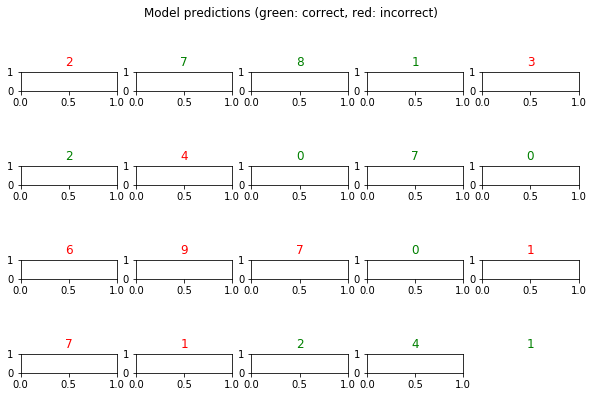

In [79]:
import matplotlib.pyplot as plt
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
print("pred:",predicted_ids)
print("true:",y_test)
#predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=4)
for n in range(20):
    plt.subplot(6,5,n+1)
    color = "green" if predicted_ids[n] == y_test[n] else "red"
    plt.title(predicted_ids[n], color=color)
plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

# Convert to TFLITE from saved_model

In [84]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_saved_model("saved_models")
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

205168

# Check input/output shapes

In [86]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
print(interpreter.get_input_details()[0]['shape'])  # Example: [1 224 224 3]
print(interpreter.get_input_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

# Print output shape and type
print(interpreter.get_output_details()[0]['shape'])  # Example: [1 1000]
print(interpreter.get_output_details()[0]['dtype'])  # Example: <class 'numpy.float32'>

[ 1 26]
<class 'numpy.float32'>
[ 1 10]
<class 'numpy.float32'>


In [87]:
print(tf.__version__)

2.0.0


# Convert keras model

In [90]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model_keras.tflite", "wb").write(tflite_model)

204708